In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

#cross validation
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#warning handle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("mushrooms.csv")
data["class"]=data["class"].replace({"p":1,"e":0})

In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
M_cols = data.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col)
    print(data[col].value_counts())
    print(" ")

Value Distribution:

class
0    4208
1    3916
Name: class, dtype: int64
 
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
 
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
 
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
 
bruises
f    4748
t    3376
Name: bruises, dtype: int64
 
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
 
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
 
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
 
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
 
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
 
stalk-shape
t    4608
e    3516
Name: stalk-sha

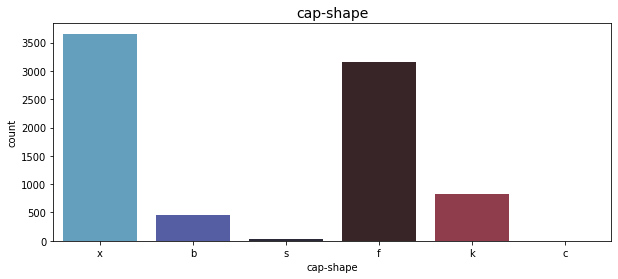

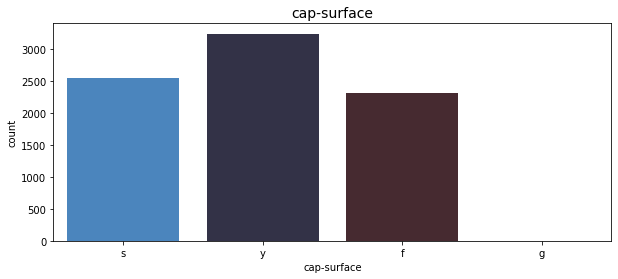

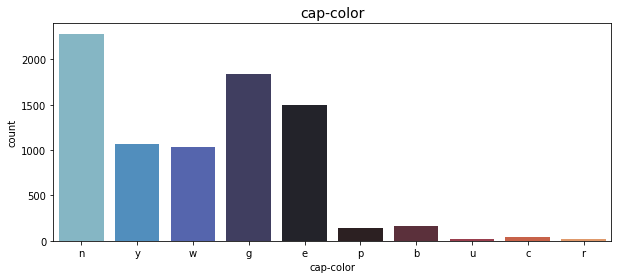

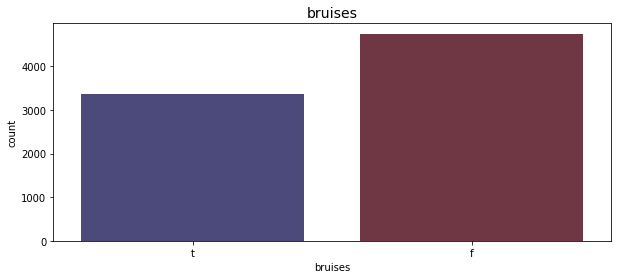

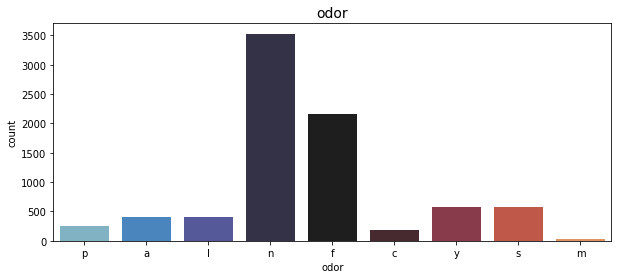

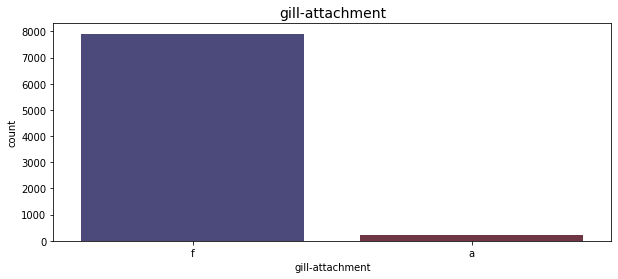

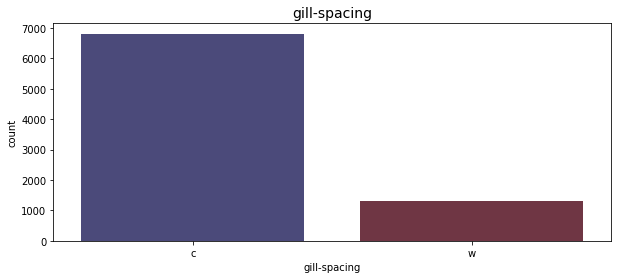

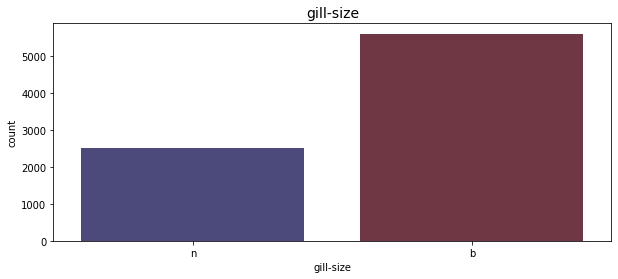

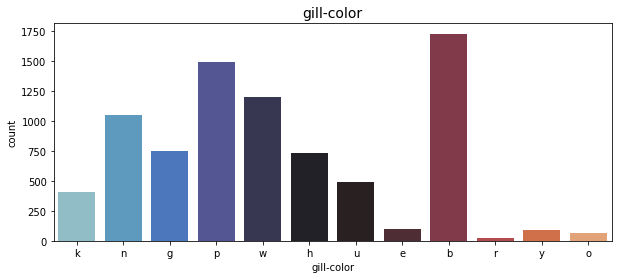

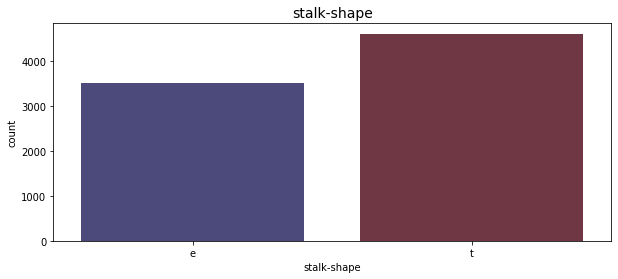

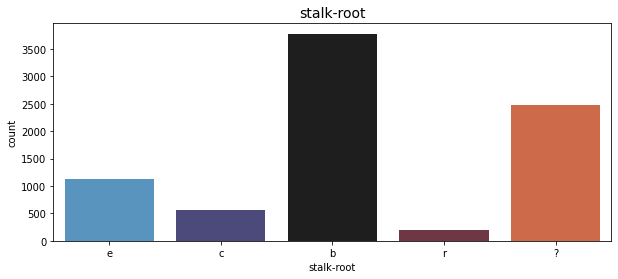

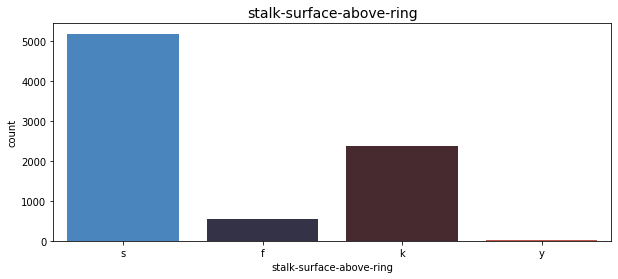

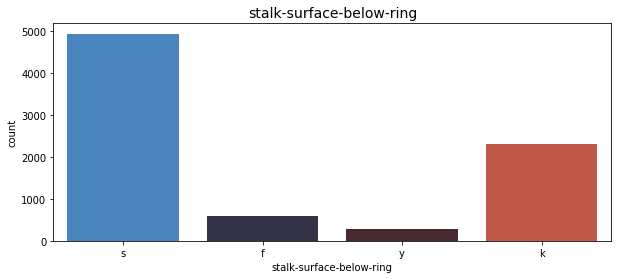

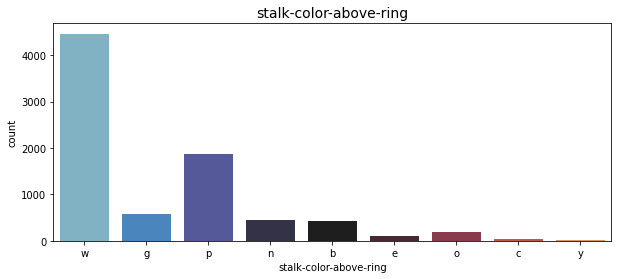

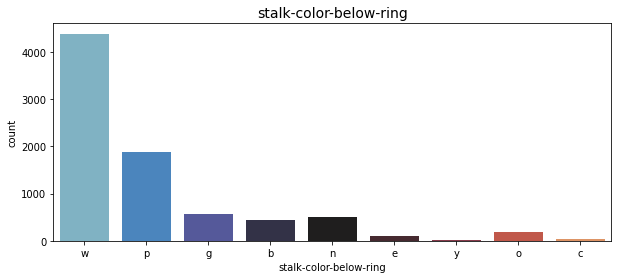

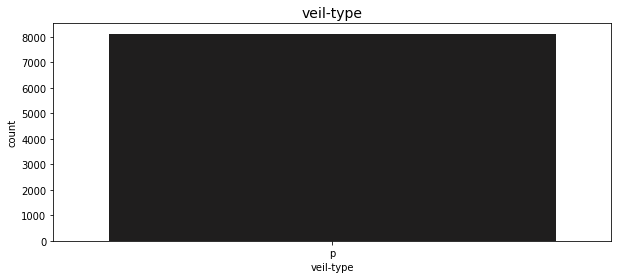

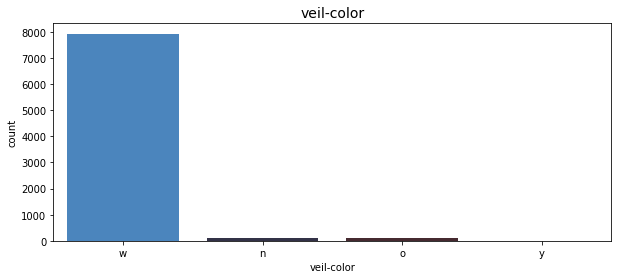

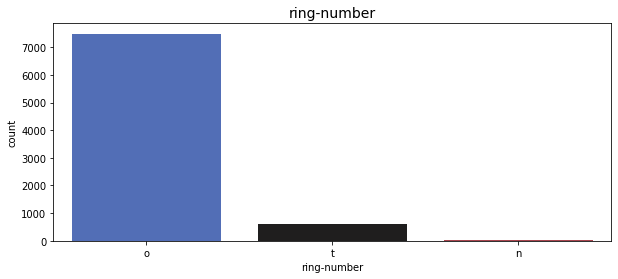

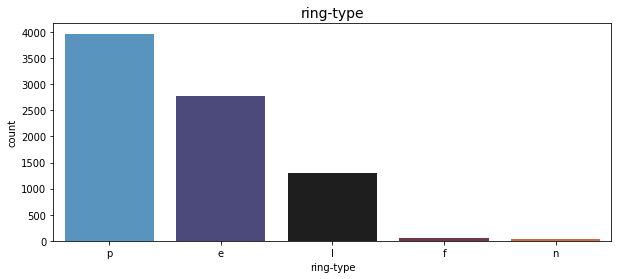

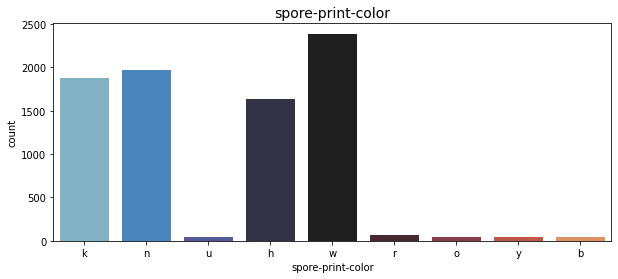

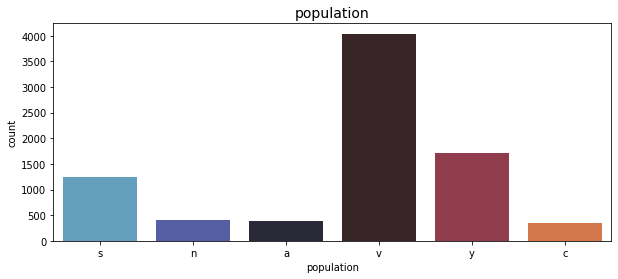

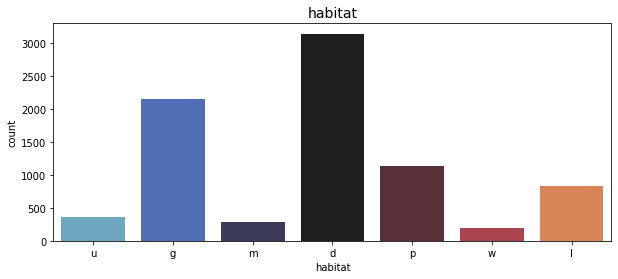

In [7]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=data ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()

In [8]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

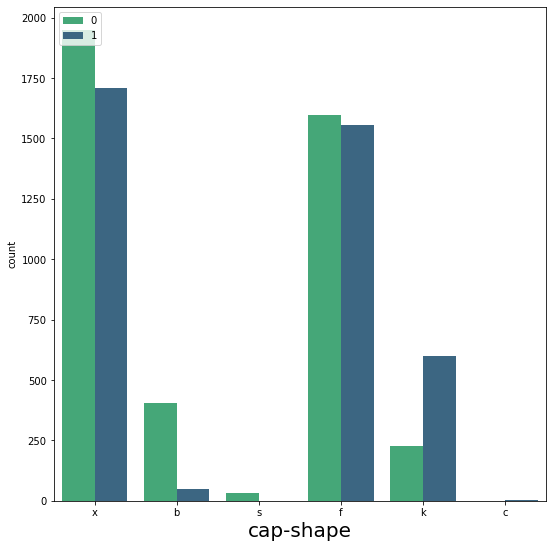

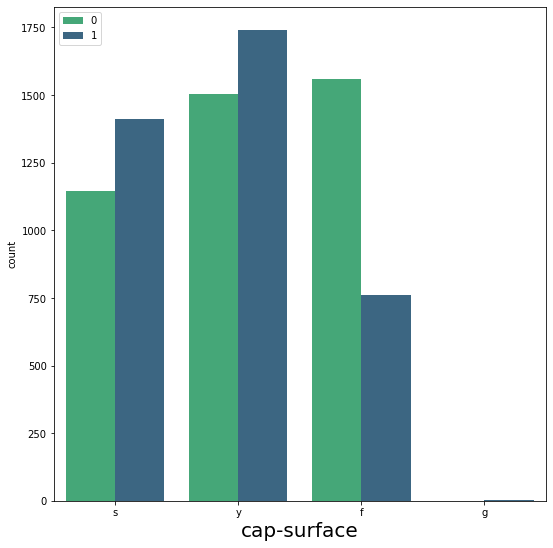

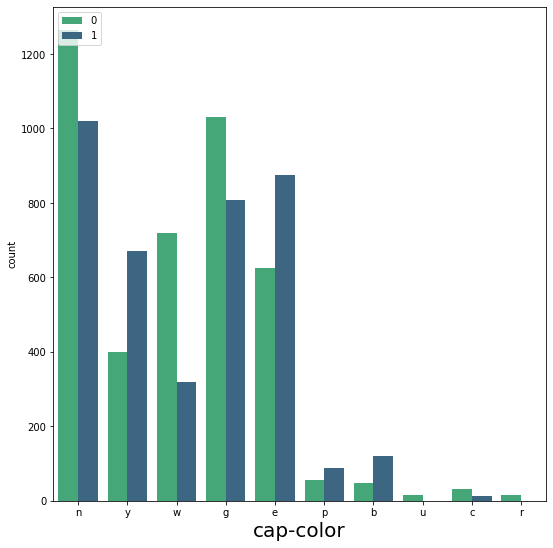

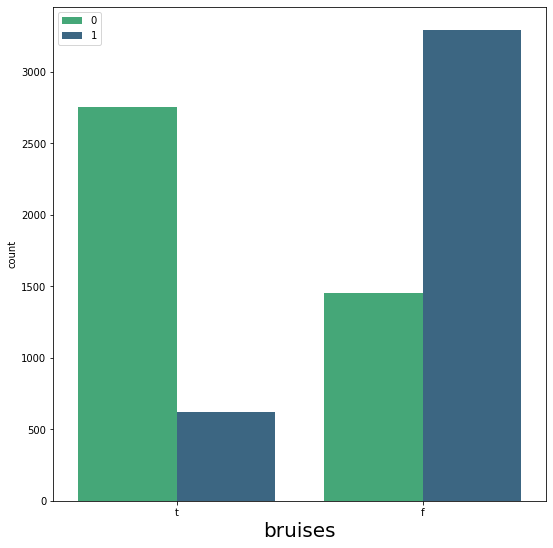

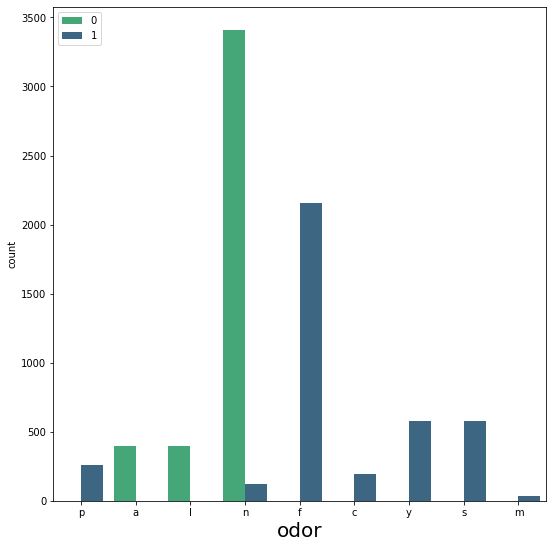

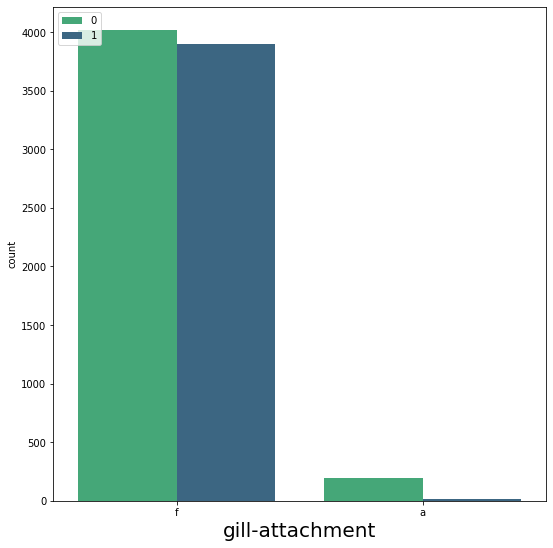

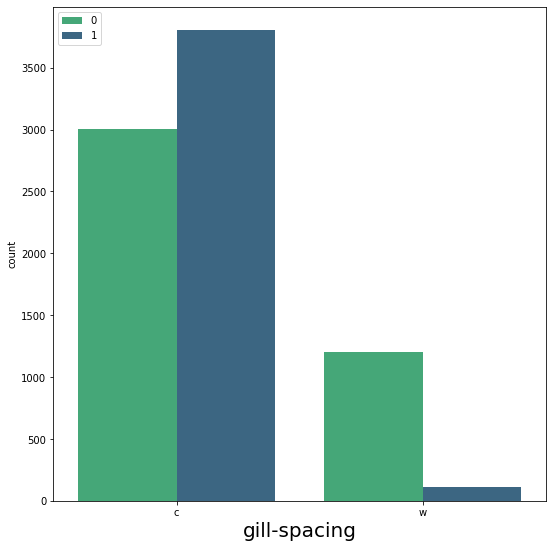

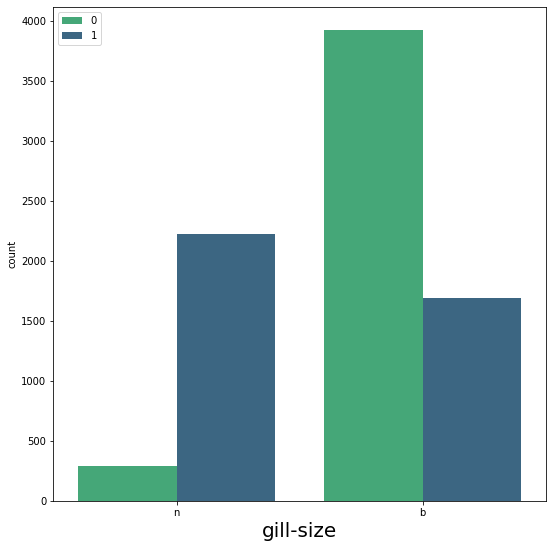

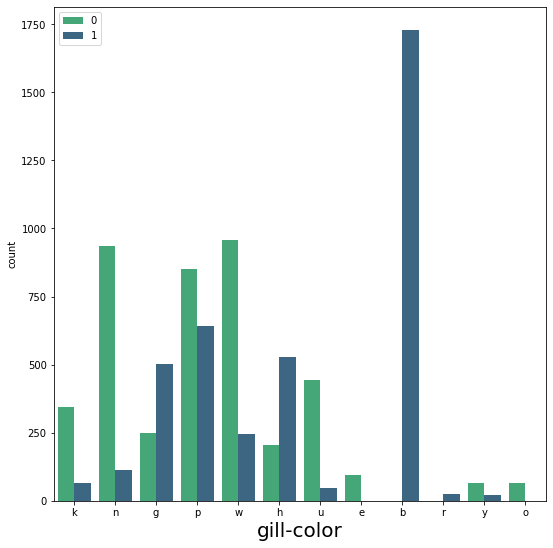

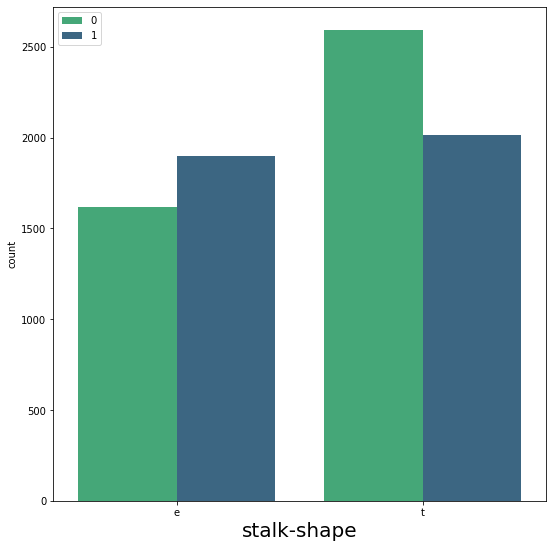

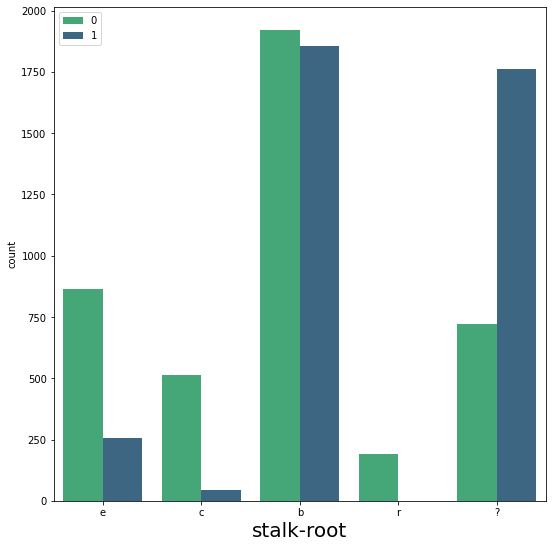

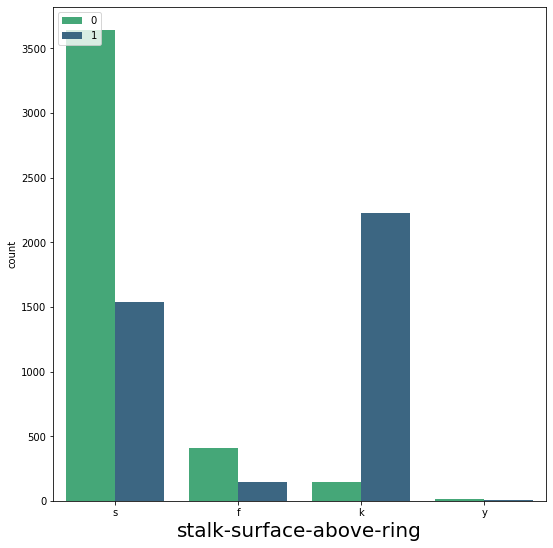

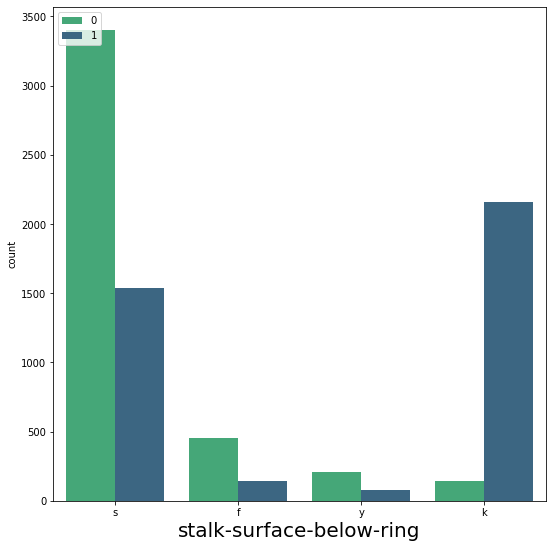

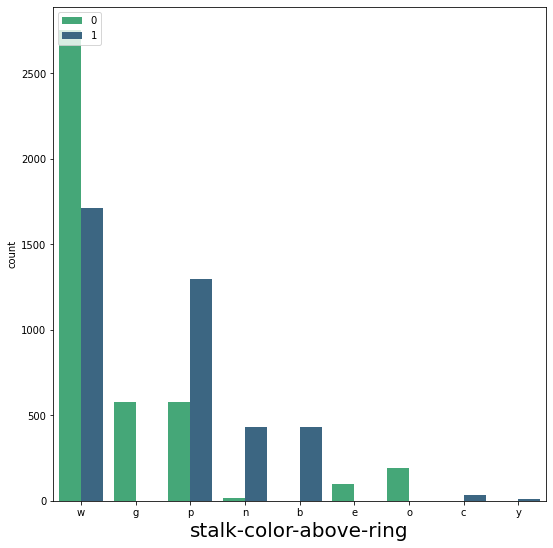

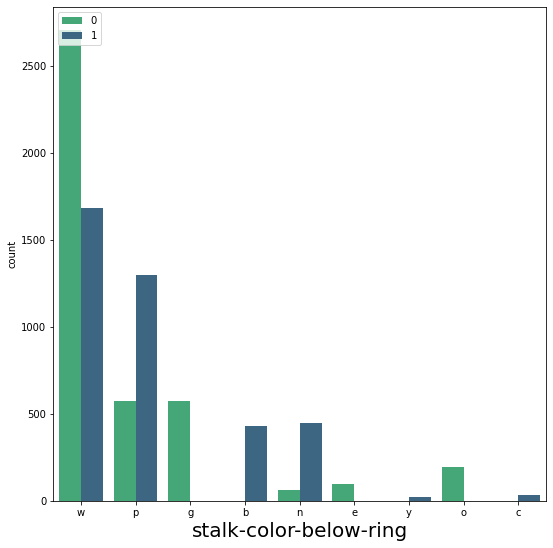

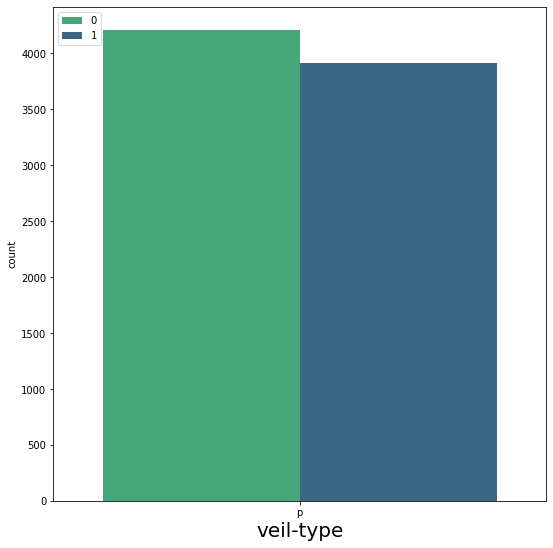

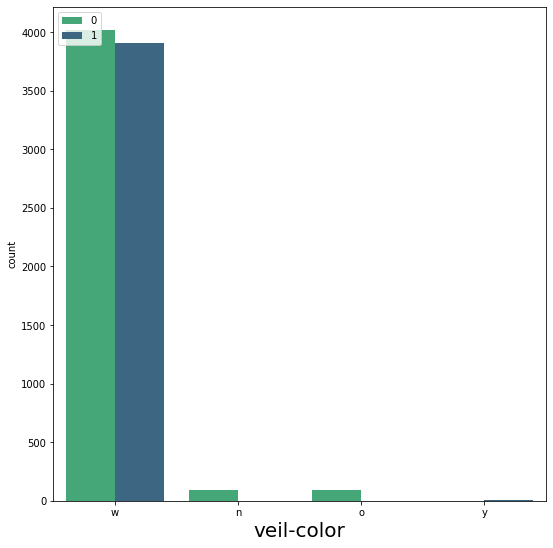

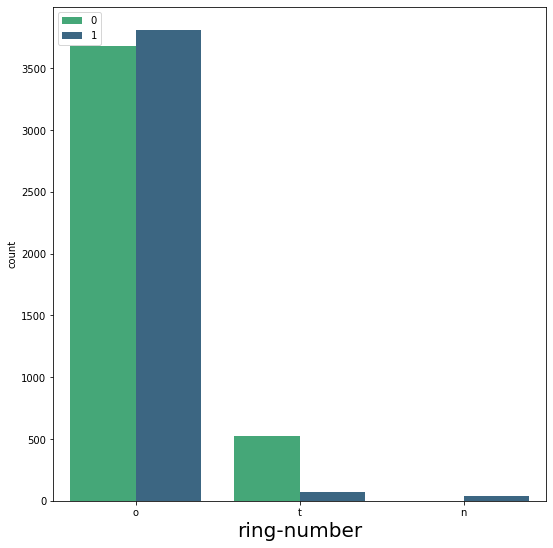

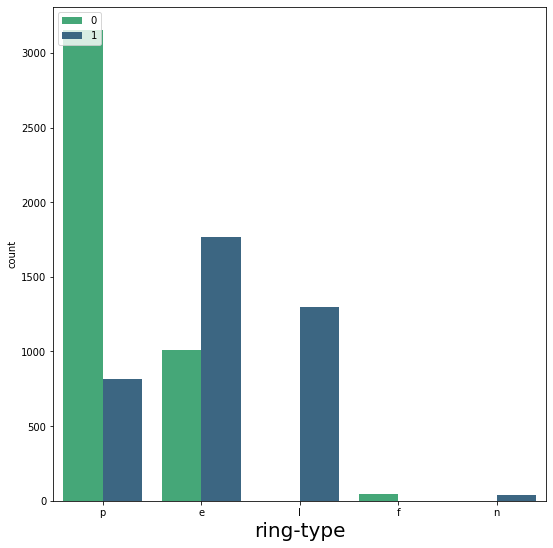

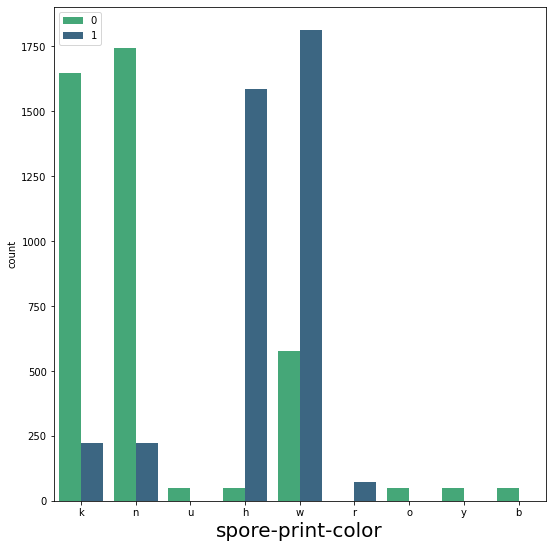

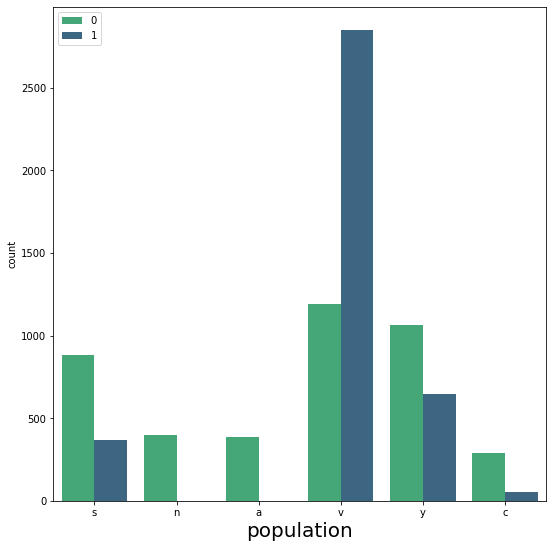

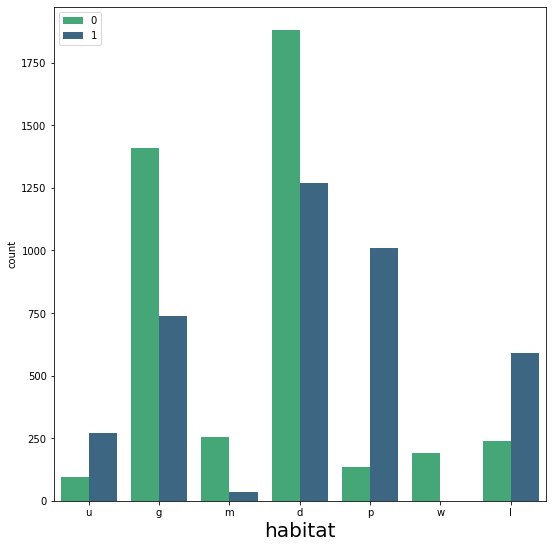

In [9]:
for col in M_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=data,palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')

In [10]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()


In [16]:
Del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number'] 
X =data.copy()
for col in Del_cols:
    X = X.drop(col, axis = 1)
for i in X.columns:
  lenc.fit(data[i])
  data[i] = lenc.transform(data[i])
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-color-above-ring,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,3,2,7,4,2,3,5
1,5,2,9,1,0,0,0,4,2,2,7,4,3,2,1
2,0,2,8,1,3,0,0,5,2,2,7,4,3,2,3
3,5,3,8,1,6,0,1,5,3,2,7,4,2,3,5
4,5,2,3,0,5,1,0,4,3,2,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,11,0,2,5,4,0,1,2
8120,5,2,4,0,5,0,0,11,0,2,5,4,0,4,2
8121,2,2,4,0,5,0,0,5,0,2,5,4,0,1,2
8122,3,3,4,0,8,0,1,0,0,2,7,0,7,4,2


In [12]:
y=data["class"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

In [29]:
def model(m):
  lr=m
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  print("Training Accuracy : ",lr.score(x_train,y_train))
  print("Testing Accuracy : ",lr.score(x_test,y_test))
  print("Precision : ",precision_score(y_test,y_pred))
  print("Recall : ",recall_score(y_test,y_pred))
  print("F1 Score : ",f1_score(y_test,y_pred))
  print("confusion matrix")
  print(confusion_matrix(y_test,y_pred))


In [30]:
model(LogisticRegression())

Training Accuracy :  0.9458394879369768
Testing Accuracy :  0.9325455440669621
Precision :  0.9505865623889086
Recall :  0.9076714188730483
F1 Score :  0.9286334433061296
confusion matrix
[[3008  139]
 [ 272 2674]]


In [31]:
model(DecisionTreeClassifier())

Training Accuracy :  1.0
Testing Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 Score :  1.0
confusion matrix
[[3147    0]
 [   0 2946]]


In [32]:
model(RandomForestClassifier())

Training Accuracy :  1.0
Testing Accuracy :  0.9986870178893813
Precision :  1.0
Recall :  0.9972844534962662
F1 Score :  0.9986403806934059
confusion matrix
[[3147    0]
 [   8 2938]]


In [33]:
model(XGBClassifier())

Training Accuracy :  0.999507631708518
Testing Accuracy :  0.9975381585425899
Precision :  1.0
Recall :  0.994908350305499
F1 Score :  0.9974476773864216
confusion matrix
[[3147    0]
 [  15 2931]]
